In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


In [3]:
print("#### DENSE 1 ####\n")
dense1.info()

#### DENSE 1 ####

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[ 0.09972198  0.06320429 -0.12226563  0.14480026]
 [-0.05909966  0.04088514 -0.07727077  0.01892341]
 [-0.01371274 -0.05188116  0.04807948 -0.08490957]
 [ 0.1454115   0.07618778  0.06651485  0.01669599]
 [-0.07673245 -0.06537205  0.16126216 -0.20761831]
 [-0.06529299 -0.01429146  0.02602116  0.01109612]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[ 1.08093102 -0.211587   -0.70685764  1.00222447 -1.411835    0.05651057]
 [ 1.05140486 -0.13242092 -0.7075268   0.92600719 -1.38297673  0.06345269]
 [ 0.89585323 -0.02667082 -0.48148411  0.72539089 -1.05715836 -0.13570118]]



In [4]:
print("#### ACTIVATION 1 ####\n")
activation1.info()

#### ACTIVATION 1 ####

Inputs:
[[ 1.08093102 -0.211587   -0.70685764  1.00222447 -1.411835    0.05651057]
 [ 1.05140486 -0.13242092 -0.7075268   0.92600719 -1.38297673  0.06345269]
 [ 0.89585323 -0.02667082 -0.48148411  0.72539089 -1.05715836 -0.13570118]]

Outputs:
[[1.08093102 0.         0.         1.00222447 0.         0.05651057]
 [1.05140486 0.         0.         0.92600719 0.         0.06345269]
 [0.89585323 0.         0.         0.72539089 0.         0.        ]]



In [5]:
print("#### DENSE 2 ####\n")
dense2.info()

#### DENSE 2 ####

Inputs:
[[1.08093102 0.         0.         1.00222447 0.         0.05651057]
 [1.05140486 0.         0.         0.92600719 0.         0.06345269]
 [0.89585323 0.         0.         0.72539089 0.         0.        ]]

Weights:
[[-0.09005489 -0.16352681  0.06378495 -0.06110513 -0.01427359  0.01036956]
 [-0.00054679 -0.04391922  0.00398056  0.01713274 -0.0272022   0.12496573]
 [-0.02527919  0.07539696 -0.01746625  0.06643083 -0.09908166  0.0951991 ]]

Biases:
[0. 0. 0.]

Outputs:
[[-0.15799819  0.0236417   0.0446333 ]
 [-0.15060996  0.02321956  0.0409774 ]
 [-0.12500107  0.0119381   0.02554188]]



In [6]:
print("#### ACTIVATION 2 ####\n")
activation2.info()

#### ACTIVATION 2 ####

Inputs:
[[-0.15799819  0.0236417   0.0446333 ]
 [-0.15060996  0.02321956  0.0409774 ]
 [-0.12500107  0.0119381   0.02554188]]

Outputs:
[[0.29207285 0.35024858 0.35767857]
 [0.29402915 0.34985138 0.35611947]
 [0.30218568 0.34653397 0.35128035]]



In [7]:
print("#### LOSS ####\n")
print(loss1, loss2)

#### LOSS ####

1.1039904509263911 1.1039904509263911


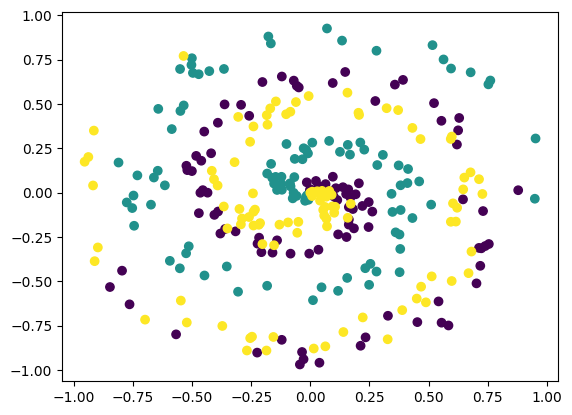

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

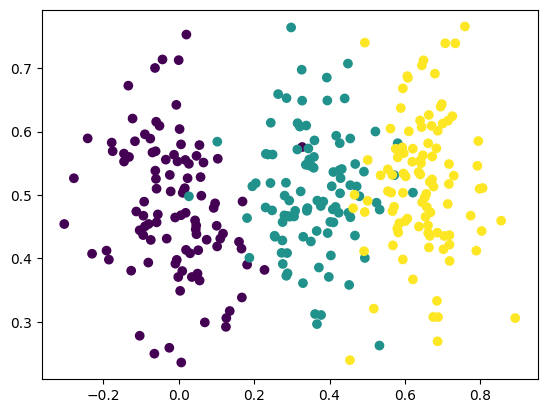

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.0971702101664393
acc: 0.3333333333333333


In [11]:
dense1.dweights

array([[ 2.30785092e-04,  2.12398429e-03],
       [ 3.62862418e-03,  1.57614494e-03],
       [ 8.03009631e-06, -2.63066862e-04],
       [-1.67656821e-03,  5.10191624e-03]])

In [12]:
dense1.dbiases

array([ 0.00435128,  0.00187628, -0.00034792, -0.01240946])

In [13]:
dense2.dweights

array([[ 2.98784852e-03,  2.61751852e-03,  8.52199942e-05,
        -2.26062592e-03],
       [-2.62508603e-03, -1.87424905e-03, -7.37254003e-04,
         1.56956427e-03],
       [-3.62762498e-04, -7.43269465e-04,  6.52034009e-04,
         6.91061644e-04]])

In [14]:
dense2.dbiases

array([ 0.00044199, -0.00409048,  0.00364849])

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.407, loss: 1.099, lr: 1
epoch: 100, acc: 0.437, loss: 1.054, lr: 1
epoch: 200, acc: 0.443, loss: 1.051, lr: 1
epoch: 300, acc: 0.447, loss: 1.048, lr: 1
epoch: 400, acc: 0.450, loss: 1.045, lr: 1
epoch: 500, acc: 0.463, loss: 1.038, lr: 1
epoch: 600, acc: 0.470, loss: 1.028, lr: 1
epoch: 700, acc: 0.483, loss: 1.013, lr: 1
epoch: 800, acc: 0.477, loss: 0.995, lr: 1
epoch: 900, acc: 0.430, loss: 0.983, lr: 1
epoch: 1000, acc: 0.463, loss: 0.970, lr: 1
epoch: 1100, acc: 0.460, loss: 0.959, lr: 1
epoch: 1200, acc: 0.447, loss: 0.952, lr: 1
epoch: 1300, acc: 0.527, loss: 0.952, lr: 1
epoch: 1400, acc: 0.477, loss: 0.935, lr: 1
epoch: 1500, acc: 0.543, loss: 0.902, lr: 1
epoch: 1600, acc: 0.603, loss: 0.869, lr: 1
epoch: 1700, acc: 0.610, loss: 0.848, lr: 1
epoch: 1800, acc: 0.633, loss: 0.815, lr: 1
epoch: 1900, acc: 0.647, loss: 0.791, lr: 1
epoch: 2000, acc: 0.657, loss: 0.775, lr: 1
epoch: 2100, acc: 0.663, loss: 0.750, lr: 1
epoch: 2200, acc: 0.673, loss: 0.732, lr: 1


In [16]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.287, loss: 1.102, lr: 1
epoch: 100, acc: 0.447, loss: 1.065, lr: 0.9099181073703367
epoch: 200, acc: 0.447, loss: 1.061, lr: 0.8340283569641367
epoch: 300, acc: 0.437, loss: 1.059, lr: 0.7698229407236336
epoch: 400, acc: 0.440, loss: 1.056, lr: 0.7147962830593281
epoch: 500, acc: 0.457, loss: 1.053, lr: 0.66711140760507
epoch: 600, acc: 0.467, loss: 1.048, lr: 0.6253908692933083
epoch: 700, acc: 0.483, loss: 1.041, lr: 0.5885815185403178
epoch: 800, acc: 0.493, loss: 1.032, lr: 0.5558643690939411
epoch: 900, acc: 0.500, loss: 1.022, lr: 0.526592943654555
epoch: 1000, acc: 0.510, loss: 1.012, lr: 0.5002501250625312
epoch: 1100, acc: 0.503, loss: 1.002, lr: 0.4764173415912339
epoch: 1200, acc: 0.503, loss: 0.993, lr: 0.45475216007276037
epoch: 1300, acc: 0.507, loss: 0.985, lr: 0.43497172683775553
epoch: 1400, acc: 0.513, loss: 0.978, lr: 0.4168403501458941
epoch: 1500, acc: 0.513, loss: 0.972, lr: 0.4001600640256102
epoch: 1600, acc: 0.517, loss: 0.965, lr: 0.3847633705

In [17]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.290, loss: 1.099, lr: 1
epoch: 100, acc: 0.523, loss: 0.945, lr: 0.9099181073703367
epoch: 200, acc: 0.593, loss: 0.797, lr: 0.8340283569641367
epoch: 300, acc: 0.713, loss: 0.589, lr: 0.7698229407236336
epoch: 400, acc: 0.757, loss: 0.543, lr: 0.7147962830593281
epoch: 500, acc: 0.783, loss: 0.429, lr: 0.66711140760507
epoch: 600, acc: 0.837, loss: 0.378, lr: 0.6253908692933083
epoch: 700, acc: 0.850, loss: 0.339, lr: 0.5885815185403178
epoch: 800, acc: 0.857, loss: 0.311, lr: 0.5558643690939411
epoch: 900, acc: 0.877, loss: 0.281, lr: 0.526592943654555
epoch: 1000, acc: 0.900, loss: 0.263, lr: 0.5002501250625312
epoch: 1100, acc: 0.923, loss: 0.242, lr: 0.4764173415912339
epoch: 1200, acc: 0.893, loss: 0.262, lr: 0.45475216007276037
epoch: 1300, acc: 0.903, loss: 0.231, lr: 0.43497172683775553
epoch: 1400, acc: 0.923, loss: 0.219, lr: 0.4168403501458941
epoch: 1500, acc: 0.917, loss: 0.223, lr: 0.4001600640256102
epoch: 1600, acc: 0.920, loss: 0.209, lr: 0.3847633705

In [18]:
from src.optimizers import AdaGrad

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = AdaGrad(learning_rate=1)
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.327, loss: 1.102, lr: 1
epoch: 100, acc: 0.427, loss: 1.014, lr: 1.0
epoch: 200, acc: 0.463, loss: 0.981, lr: 1.0
epoch: 300, acc: 0.503, loss: 0.943, lr: 1.0
epoch: 400, acc: 0.563, loss: 0.924, lr: 1.0
epoch: 500, acc: 0.530, loss: 0.891, lr: 1.0
epoch: 600, acc: 0.580, loss: 0.893, lr: 1.0
epoch: 700, acc: 0.600, loss: 0.848, lr: 1.0
epoch: 800, acc: 0.613, loss: 0.840, lr: 1.0
epoch: 900, acc: 0.613, loss: 0.818, lr: 1.0
epoch: 1000, acc: 0.643, loss: 0.792, lr: 1.0
epoch: 1100, acc: 0.660, loss: 0.765, lr: 1.0
epoch: 1200, acc: 0.670, loss: 0.764, lr: 1.0
epoch: 1300, acc: 0.660, loss: 0.746, lr: 1.0
epoch: 1400, acc: 0.677, loss: 0.744, lr: 1.0
epoch: 1500, acc: 0.667, loss: 0.744, lr: 1.0
epoch: 1600, acc: 0.710, loss: 0.693, lr: 1.0
epoch: 1700, acc: 0.707, loss: 0.708, lr: 1.0
epoch: 1800, acc: 0.713, loss: 0.697, lr: 1.0
epoch: 1900, acc: 0.733, loss: 0.689, lr: 1.0
epoch: 2000, acc: 0.740, loss: 0.659, lr: 1.0
epoch: 2100, acc: 0.723, loss: 0.670, lr: 1.0
ep

In [19]:
from src.optimizers import RMSProp

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = RMSProp(decay=1e-4)
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.347, loss: 1.098, lr: 0.001
epoch: 100, acc: 0.393, loss: 1.069, lr: 0.0009901970492127933
epoch: 200, acc: 0.457, loss: 1.062, lr: 0.0009804882831650162
epoch: 300, acc: 0.463, loss: 1.056, lr: 0.0009709680551509856
epoch: 400, acc: 0.477, loss: 1.047, lr: 0.0009616309260505818
epoch: 500, acc: 0.500, loss: 1.036, lr: 0.0009524716639679969
epoch: 600, acc: 0.520, loss: 1.025, lr: 0.0009434852344560807
epoch: 700, acc: 0.527, loss: 1.014, lr: 0.0009346667912889055
epoch: 800, acc: 0.540, loss: 1.003, lr: 0.0009260116677470135
epoch: 900, acc: 0.530, loss: 0.993, lr: 0.0009175153683824203
epoch: 1000, acc: 0.540, loss: 0.982, lr: 0.0009091735612328393
epoch: 1100, acc: 0.553, loss: 0.970, lr: 0.0009009820704567979
epoch: 1200, acc: 0.547, loss: 0.958, lr: 0.0008929368693633361
epoch: 1300, acc: 0.563, loss: 0.946, lr: 0.0008850340738118417
epoch: 1400, acc: 0.573, loss: 0.934, lr: 0.0008772699359592947
epoch: 1500, acc: 0.583, loss: 0.921, lr: 0.0008696408383337683
epoc

In [20]:
from src.optimizers import Adam

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(n_neurons=64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(n_neurons=3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.350, loss: 1.095, lr: 0.001
epoch: 100, acc: 0.443, loss: 1.067, lr: 0.001
epoch: 200, acc: 0.443, loss: 1.062, lr: 0.001
epoch: 300, acc: 0.450, loss: 1.052, lr: 0.001
epoch: 400, acc: 0.470, loss: 1.035, lr: 0.001
epoch: 500, acc: 0.500, loss: 1.011, lr: 0.001
epoch: 600, acc: 0.537, loss: 0.981, lr: 0.001
epoch: 700, acc: 0.590, loss: 0.948, lr: 0.001
epoch: 800, acc: 0.633, loss: 0.914, lr: 0.001
epoch: 900, acc: 0.647, loss: 0.878, lr: 0.001
epoch: 1000, acc: 0.667, loss: 0.843, lr: 0.001
epoch: 1100, acc: 0.683, loss: 0.809, lr: 0.001
epoch: 1200, acc: 0.707, loss: 0.776, lr: 0.001
epoch: 1300, acc: 0.720, loss: 0.745, lr: 0.001
epoch: 1400, acc: 0.733, loss: 0.716, lr: 0.001
epoch: 1500, acc: 0.743, loss: 0.689, lr: 0.001
epoch: 1600, acc: 0.753, loss: 0.663, lr: 0.001
epoch: 1700, acc: 0.767, loss: 0.639, lr: 0.001
epoch: 1800, acc: 0.790, loss: 0.615, lr: 0.001
epoch: 1900, acc: 0.807, loss: 0.591, lr: 0.001
epoch: 2000, acc: 0.823, loss: 0.569, lr: 0.001
epoc